In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
mnist = tf.keras.datasets.mnist
cifar = tf.keras.datasets.cifar10

In [5]:
(x_train1,y_train1),(x_test1,y_test1)=mnist.load_data()
(x_train2,y_train2),(x_test2,y_test2)=cifar.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train1.shape

(60000, 28, 28)

In [ ]:
x_train2.shape

(50000, 32, 32, 3)

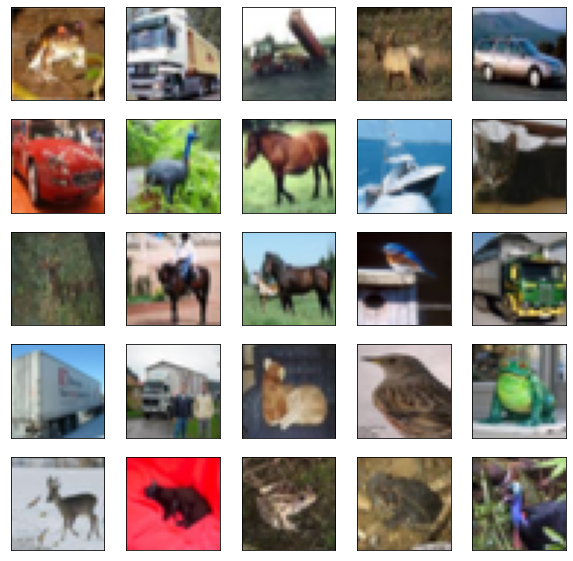

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train2[i])
plt.show()

In [6]:
x_train1=x_train1/255.0
x_test1=x_test1/255.0
x_train2=x_train2/255.0
x_test2=x_test2/255.0

#1. Design a CNN with:
a) One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0
b) One Pooling layer which uses MAXPOOLING with stride =2.
c) One hidden layer having number of neurons = 100

In [ ]:
modelmnist1=tf.keras.Sequential()
modelmnist1.add(tf.keras.Input(shape=(28,28,1)))
modelmnist1.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),strides=1,activation='relu',padding='same'))
modelmnist1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
modelmnist1.add(tf.keras.layers.Flatten(name="inputLayer"))
modelmnist1.add(tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer"))
modelmnist1.add(tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"))
modelmnist1.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 inputLayer (Flatten)        (None, 6272)              0         
                                                                 
 hiddenlayer (Dense)         (None, 100)               627300    
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 629,142
Trainable params: 629,142
Non-trainable params: 0
_______________________________________________

In [ ]:
modelmnist1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
historymnist1 = modelmnist1.fit(x_train1,y_train1,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1465 - accuracy: 0.9557 - val_loss: 0.0591 - val_accuracy: 0.9823
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.0493 - val_accuracy: 0.9860
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0451 - val_accuracy: 0.9877
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0368 - val_accuracy: 0.9908
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0424 - val_accuracy: 0.9897
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0117 - accuracy: 0.9958 - val_loss: 0.0423 - val_accuracy: 0.9912
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0491 - val_accuracy:

In [ ]:
test_loss_mnist1, test_acc_mnist1 = modelmnist1.evaluate(x_test1, y_test1)

print('Test accuracy of mnistmodel 1:', test_acc_mnist1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0476 - accuracy: 0.9881
Test accuracy of mnistmodel 1: 0.988099992275238


In [ ]:
modelcifar1=tf.keras.Sequential()
modelcifar1.add(tf.keras.Input(shape=(32,32,3)))
modelcifar1.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),strides=1,activation='relu',padding='same'))
modelcifar1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
modelcifar1.add(tf.keras.layers.Flatten(name="inputLayer"))
modelcifar1.add(tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer"))
modelcifar1.add(tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"))
modelcifar1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 inputLayer (Flatten)        (None, 8192)              0         
                                                                 
 hiddenlayer (Dense)         (None, 100)               819300    
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 822,742
Trainable params: 822,742
Non-trainable params: 0
_______________________________________________

In [ ]:
modelcifar1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
historycifar1 = modelcifar1.fit(x_train2,y_train2,batch_size=25,epochs=20,validation_split=0.1)

Epoch 1/20
1800/1800 [==============================] - 6s 3ms/step - loss: 1.4936 - accuracy: 0.4635 - val_loss: 1.2729 - val_accuracy: 0.5608
Epoch 2/20
1800/1800 [==============================] - 5s 3ms/step - loss: 1.1790 - accuracy: 0.5854 - val_loss: 1.1624 - val_accuracy: 0.5980
Epoch 3/20
1800/1800 [==============================] - 5s 3ms/step - loss: 1.0412 - accuracy: 0.6336 - val_loss: 1.1006 - val_accuracy: 0.6240
Epoch 4/20
1800/1800 [==============================] - 6s 3ms/step - loss: 0.9394 - accuracy: 0.6710 - val_loss: 1.0790 - val_accuracy: 0.6278
Epoch 5/20
1800/1800 [==============================] - 6s 3ms/step - loss: 0.8534 - accuracy: 0.6999 - val_loss: 1.0725 - val_accuracy: 0.6426
Epoch 6/20
1800/1800 [==============================] - 6s 3ms/step - loss: 0.7746 - accuracy: 0.7279 - val_loss: 1.0576 - val_accuracy: 0.6604
Epoch 7/20
1800/1800 [==============================] - 6s 3ms/step - loss: 0.7006 - accuracy: 0.7544 - val_loss: 1.1580 - val_accuracy:

In [ ]:
test_loss_cifar1, test_acc_cifar1 = modelcifar1.evaluate(x_test2, y_test2)

print('Test accuracy of cifarmodel 1:', test_acc_cifar1)

313/313 [==============================] - 1s 3ms/step - loss: 2.5569 - accuracy: 0.5952
Test accuracy of cifarmodel 1: 0.5952000021934509


#2. Design a CNN with:
a) Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1 and, 
padding =0
b) One Pooling layer which uses MAXPOOLING with stride =2.
c) One hidden layer having number of neurons = 100
Note: use ReLU activation function after each convolution layer.

In [ ]:
modelmnist2=tf.keras.Sequential()
modelmnist2.add(tf.keras.Input(shape=(28,28,1)))
modelmnist2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
modelmnist2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
modelmnist2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,))
modelmnist2.add(tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"))
modelmnist2.add(tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer"))
modelmnist2.add(tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"))
modelmnist2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 inputLayer (Flatten)        (None, 6272)              0         
                                                                 
 hiddenlayer (Dense)         (None, 100)               627300    
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                     

In [ ]:
modelmnist2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
historymnist2 = modelmnist2.fit(x_train1,y_train1,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1245 - accuracy: 0.9619 - val_loss: 0.0434 - val_accuracy: 0.9872
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0436 - val_accuracy: 0.9893
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.0422 - val_accuracy: 0.9885
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0472 - val_accuracy: 0.9880
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0387 - val_accuracy: 0.9900
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0097 - accuracy: 0.9963 - val_loss: 0.0515 - val_accuracy: 0.9898
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.0448 - val_accuracy:

In [ ]:
test_loss_mnist2, test_acc_mnist2 = modelmnist2.evaluate(x_test1, y_test1)

print('Test accuracy of mnistmodel 2:', test_acc_mnist2)

313/313 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9898
Test accuracy of mnistmodel 2: 0.989799976348877


In [ ]:
modelcifar2=tf.keras.Sequential()
modelcifar2.add(tf.keras.Input(shape=(32,32,3)))
modelcifar2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
modelcifar2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
modelcifar2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
modelcifar2.add(tf.keras.layers.Flatten(name="inputLayer"))
modelcifar2.add(tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer"))
modelcifar2.add(tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"))
modelcifar2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 inputLayer (Flatten)        (None, 8192)              0         
                                                                 
 hiddenlayer (Dense)         (None, 100)               819300    
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                     

In [ ]:
modelcifar2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
historycifar2 = modelcifar2.fit(x_train2,y_train2,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4251 - accuracy: 0.4919 - val_loss: 1.1702 - val_accuracy: 0.5956
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0255 - accuracy: 0.6420 - val_loss: 0.9761 - val_accuracy: 0.6652
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8886 - accuracy: 0.6912 - val_loss: 0.9290 - val_accuracy: 0.6804
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7930 - accuracy: 0.7235 - val_loss: 0.9270 - val_accuracy: 0.6840
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7130 - accuracy: 0.7524 - val_loss: 0.9448 - val_accuracy: 0.6796
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6353 - accuracy: 0.7782 - val_loss: 0.9975 - val_accuracy: 0.6756
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5660 - accuracy: 0.8006 - val_loss: 1.0156 - val_accuracy:

In [ ]:
test_loss_cifar2, test_acc_cifar2 = modelcifar2.evaluate(x_test2, y_test2)

print('Test accuracy of cifarmodel 2:', test_acc_cifar2)

313/313 [==============================] - 1s 3ms/step - loss: 1.3597 - accuracy: 0.6523
Test accuracy of cifarmodel 2: 0.6523000001907349


# 3. Design the LeNet-5 architecture

MNIST model

In [ ]:
modellenetmnist=tf.keras.Sequential()
modellenetmnist.add(tf.keras.Input(shape=(28,28,1)))
modellenetmnist.add(tf.keras.layers.Conv2D(6,kernel_size=(5,5),strides=1,activation='tanh',padding='same'))
modellenetmnist.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
modellenetmnist.add(tf.keras.layers.Conv2D(16,kernel_size=(5,5),strides=1,activation='tanh',padding='valid'))
modellenetmnist.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
modellenetmnist.add(tf.keras.layers.Flatten(name="inputLayer"))
modellenetmnist.add(tf.keras.layers.Dense(84,activation='sigmoid',name="hiddenlayer"))
modellenetmnist.add(tf.keras.layers.Dense(10,activation="sigmoid",name="outputlayer"))
modellenetmnist.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 inputLayer (Flatten)        (None, 400)               0         
                                                                 
 hiddenlayer (Dense)         (None, 84)              

In [ ]:
modellenetmnist.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
historylenetmnist = modellenetmnist.fit(x_train1,y_train1,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2845 - accuracy: 0.9255 - val_loss: 0.0743 - val_accuracy: 0.9798
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0699 - accuracy: 0.9802 - val_loss: 0.0519 - val_accuracy: 0.9860
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9856 - val_loss: 0.0505 - val_accuracy: 0.9858
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0434 - val_accuracy: 0.9887
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0305 - accuracy: 0.9907 - val_loss: 0.0409 - val_accuracy: 0.9898
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0240 - accuracy: 0.9930 - val_loss: 0.0397 - val_accuracy: 0.9898
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.0411 - val_accuracy:

Cifar  model

In [ ]:
modellenetcifar=tf.keras.Sequential()
modellenetcifar.add(tf.keras.Input(shape=(32,32,3)))
modellenetcifar.add(tf.keras.layers.Conv2D(6,kernel_size=(5,5),strides=1,activation='tanh',padding='same'))
modellenetcifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
modellenetcifar.add(tf.keras.layers.Conv2D(16,kernel_size=(5,5),strides=1,activation='tanh',padding='valid'))
modellenetcifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
modellenetcifar.add(tf.keras.layers.Flatten(name="inputLayer"))
modellenetcifar.add(tf.keras.layers.Dense(84,activation='sigmoid',name="hiddenlayer"))
modellenetcifar.add(tf.keras.layers.Dense(10,activation="sigmoid",name="outputlayer"))
modellenetcifar.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 inputLayer (Flatten)        (None, 576)               0         
                                                                 
 hiddenlayer (Dense)         (None, 84)              

In [ ]:
modellenetcifar.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
historylenetcifar = modellenetcifar.fit(x_train2,y_train2,batch_size=20,epochs=20,validation_split=0.1)

Epoch 1/20
2250/2250 [==============================] - 8s 3ms/step - loss: 1.5905 - accuracy: 0.4290 - val_loss: 1.3434 - val_accuracy: 0.5274
Epoch 2/20
2250/2250 [==============================] - 7s 3ms/step - loss: 1.2927 - accuracy: 0.5408 - val_loss: 1.2202 - val_accuracy: 0.5766
Epoch 3/20
2250/2250 [==============================] - 7s 3ms/step - loss: 1.1796 - accuracy: 0.5830 - val_loss: 1.1592 - val_accuracy: 0.5972
Epoch 4/20
2250/2250 [==============================] - 7s 3ms/step - loss: 1.1074 - accuracy: 0.6102 - val_loss: 1.1374 - val_accuracy: 0.5944
Epoch 5/20
2250/2250 [==============================] - 7s 3ms/step - loss: 1.0495 - accuracy: 0.6303 - val_loss: 1.1193 - val_accuracy: 0.6044
Epoch 6/20
2250/2250 [==============================] - 7s 3ms/step - loss: 1.0026 - accuracy: 0.6464 - val_loss: 1.0661 - val_accuracy: 0.6314
Epoch 7/20
2250/2250 [==============================] - 7s 3ms/step - loss: 0.9619 - accuracy: 0.6632 - val_loss: 1.0685 - val_accuracy:

In [ ]:
test_loss_mnist3, test_acc_mnist3 = modellenetmnist.evaluate(x_test1, y_test1)

print('Test accuracy of LeNet-5 for mnist:', test_acc_mnist3)

313/313 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9895
Test accuracy of LeNet-5 for mnist: 0.9894999861717224


In [ ]:
test_loss_cifar3, test_acc_cifar3 = modellenetcifar.evaluate(x_test2, y_test2)

print('Test accuracy of LeNet-5 for Cifar:', test_acc_cifar3)

313/313 [==============================] - 1s 3ms/step - loss: 1.2543 - accuracy: 0.6050
Test accuracy of LeNet-5 for Cifar: 0.6050000190734863


#4. Compare their performance

**Mnist Dataset**



Text(0.5, 1.0, 'Training - Loss Function Model 3')

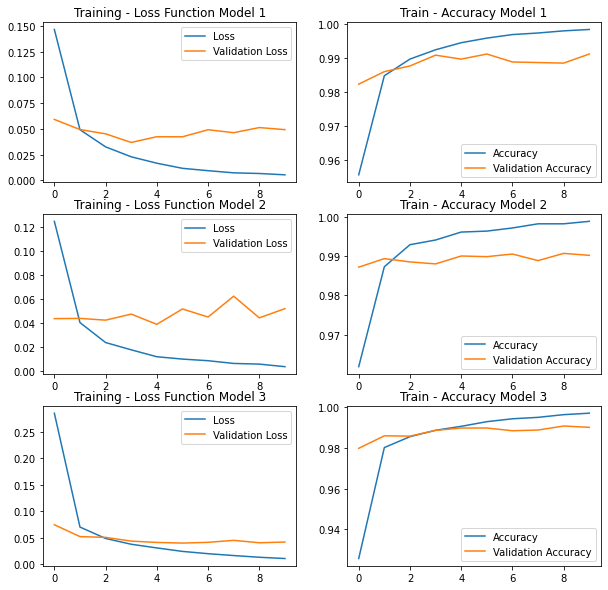

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 2)
plt.plot(historymnist1.history['accuracy'], label='Accuracy')
plt.plot(historymnist1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Model 1')

plt.subplot(3, 2, 1)
plt.plot(historymnist1.history['loss'], label='Loss')
plt.plot(historymnist1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Function Model 1')

plt.subplot(3, 2, 4)
plt.plot(historymnist2.history['accuracy'], label='Accuracy')
plt.plot(historymnist2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Model 2')

plt.subplot(3, 2, 3)
plt.plot(historymnist2.history['loss'], label='Loss')
plt.plot(historymnist2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Function Model 2')

plt.subplot(3, 2, 6)
plt.plot(historylenetmnist.history['accuracy'], label='Accuracy')
plt.plot(historylenetmnist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Model 3')

plt.subplot(3, 2, 5)
plt.plot(historylenetmnist.history['loss'], label='Loss')
plt.plot(historylenetmnist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Function Model 3')

**Cifar-10**

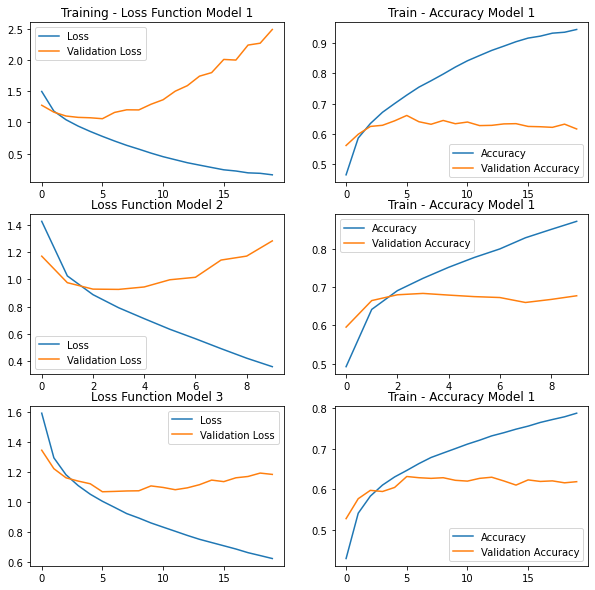

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 2)
plt.plot(historycifar1.history['accuracy'], label='Accuracy')
plt.plot(historycifar1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy Model 1')

plt.subplot(3, 2, 1)
plt.plot(historycifar1.history['loss'], label='Loss')
plt.plot(historycifar1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function Model 1')

plt.subplot(3, 2, 4)
plt.plot(historycifar2.history['accuracy'], label='Accuracy')
plt.plot(historycifar2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy Model 1')

plt.subplot(3, 2, 3)
plt.plot(historycifar2.history['loss'], label='Loss')
plt.plot(historycifar2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Function Model 2')

plt.subplot(3, 2, 6)
plt.plot(historylenetcifar.history['accuracy'], label='Accuracy')
plt.plot(historylenetcifar.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy Model 1')

plt.subplot(3, 2, 5)
plt.plot(historylenetcifar.history['loss'], label='Loss')
plt.plot(historylenetcifar.history['val_loss'], label='Validation Loss')
plt.title('Loss Function Model 3')
plt.legend()

#5. Modify the architectures/hyperparametersto improveto performance.

CNN for MNIST dataset are giving good accuracy, hence Creating new model only for CIFAR-10 dataset

In [41]:
modelcifar4=tf.keras.Sequential()
modelcifar4.add(tf.keras.Input(shape=(32,32,3)))
modelcifar4.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',padding='valid'))
modelcifar4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
modelcifar4.add(tf.keras.layers.Dropout(0.25))
modelcifar4.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',padding='valid'))
modelcifar4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
modelcifar4.add(tf.keras.layers.Dropout(0.25))
modelcifar4.add(tf.keras.layers.Flatten(name="inputLayer"))
modelcifar4.add(tf.keras.layers.Dense(256,activation='relu',name="hiddenlayer1"))
modelcifar4.add(tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"))
modelcifar4.summary()

modelcifar4.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])



Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 6, 6, 32)        

In [42]:
history4 = modelcifar4.fit(x_train2,y_train2,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 1.5353 - accuracy: 0.4426 - val_loss: 1.2536 - val_accuracy: 0.5568
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2022 - accuracy: 0.5744 - val_loss: 1.0622 - val_accuracy: 0.6330
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0840 - accuracy: 0.6162 - val_loss: 0.9681 - val_accuracy: 0.6704
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9882 - accuracy: 0.6523 - val_loss: 0.9257 - val_accuracy: 0.6898
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9146 - accuracy: 0.6789 - val_loss: 0.8686 - val_accuracy: 0.7054
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8516 - accuracy: 0.7012 - val_loss: 0.8878 - val_accuracy: 0.6972
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8020 - accuracy: 0.7169 - val_loss: 0.8559 - val_accuracy:

In [43]:
test_loss_cifar4, test_acc_cifar4 = modelcifar4.evaluate(x_test2, y_test2)

print('Test accuracy of cifarmodel 4:', test_acc_cifar4)

313/313 [==============================] - 1s 3ms/step - loss: 0.8556 - accuracy: 0.7128
Test accuracy of cifarmodel 4: 0.7128000259399414
